In [1]:
import sys
sys.path.append("../../")

../../../evolutions/2023-09-11T13-13-36_test_evolve


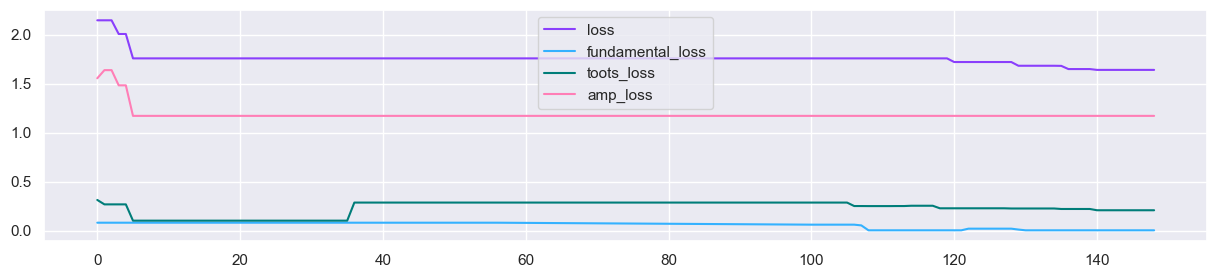

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
evolutions_folder="../../../evolutions/"
subfolders = sorted(os.listdir(evolutions_folder))
latestfolder = os.path.join(evolutions_folder, subfolders[-1])
print(latestfolder)
df = pd.read_csv(os.path.join(latestfolder, "losses.csv"))
steps = []
df = df.query("i_generation<i_generation.max()")
df

x = df.i_generation.unique()

columns=list(df.columns)
columns=columns[columns.index("loss"):]
colors = ['#8a3ffc', '#33b1ff', '#007d79', '#ff7eb6', '#fa4d56', '#fff1f1', '#6fdc8c', '#4589ff', '#d12771', '#d2a106', '#08bdba', '#bae6ff', '#ba4e00', '#d4bbff']
for i in range(len(columns)):
    c = columns[i]
    ymin=df.groupby("i_generation")[c].min()
    #ymax=df.groupby("i_generation")[c].max()
    #plt.fill_between(x, ymin, ymax, label=c, color=colors[i])
    plt.plot(x, ymin, label=c, color=colors[i])

plt.legend()
#for i_mutant in df.i_mutant.unique():
#    plt.plot(x,df.query("i_mutant==@i_mutant").loss)


['D1 (24)', 'E2 (30)', 'C#3 (-45)', 'F#3 (14)', 'A#4 (16)', 'D4 (14)', 'F4 (5)', 'A5 (-22)']
['D1 (0)', 'F#2 (46)', 'C3 (-18)', 'G3 (-30)', 'B4 (19)', 'D#4 (37)', 'F4 (-1)', 'B5 (-15)']
['D1 (-11)', 'F2 (20)', 'D3 (15)', 'G3 (-41)', 'C4 (9)', 'D#4 (36)', 'F#4 (34)', 'A#5 (-36)']
['D1 (-3)', 'D#2 (-27)', 'C3 (4)', 'F3 (7)', 'A4 (-19)', 'C#4 (24)', 'E4 (13)', 'G4 (-3)', 'A5 (30)', 'B5 (-9)']
['D1 (2)', 'E2 (-22)', 'C#3 (-11)', 'G3 (14)', 'B4 (-19)', 'D4 (-40)', 'F4 (-16)', 'G4 (-1)']
['D1 (-12)', 'F2 (9)', 'D3 (47)', 'F#3 (27)', 'B4 (-5)', 'D#4 (12)', 'G4 (-25)', 'A#5 (36)']
['D1 (3)', 'F#2 (20)', 'D3 (-10)', 'G3 (-49)', 'C4 (-6)', 'D#4 (-20)', 'A5 (16)']
['D1 (-10)', 'E2 (25)', 'C#3 (48)', 'F#3 (49)', 'B4 (14)', 'D4 (43)', 'F4 (-8)', 'A5 (-38)']
['D1 (0)', 'G2 (25)', 'D3 (-3)', 'G3 (-10)', 'C4 (11)', 'E4 (-24)', 'F#4 (-46)', 'A5 (6)']
['D1 (-10)', 'E2 (26)', 'C#3 (6)', 'F#3 (10)', 'B4 (16)', 'D4 (-37)', 'F4 (-7)', 'A5 (-2)']


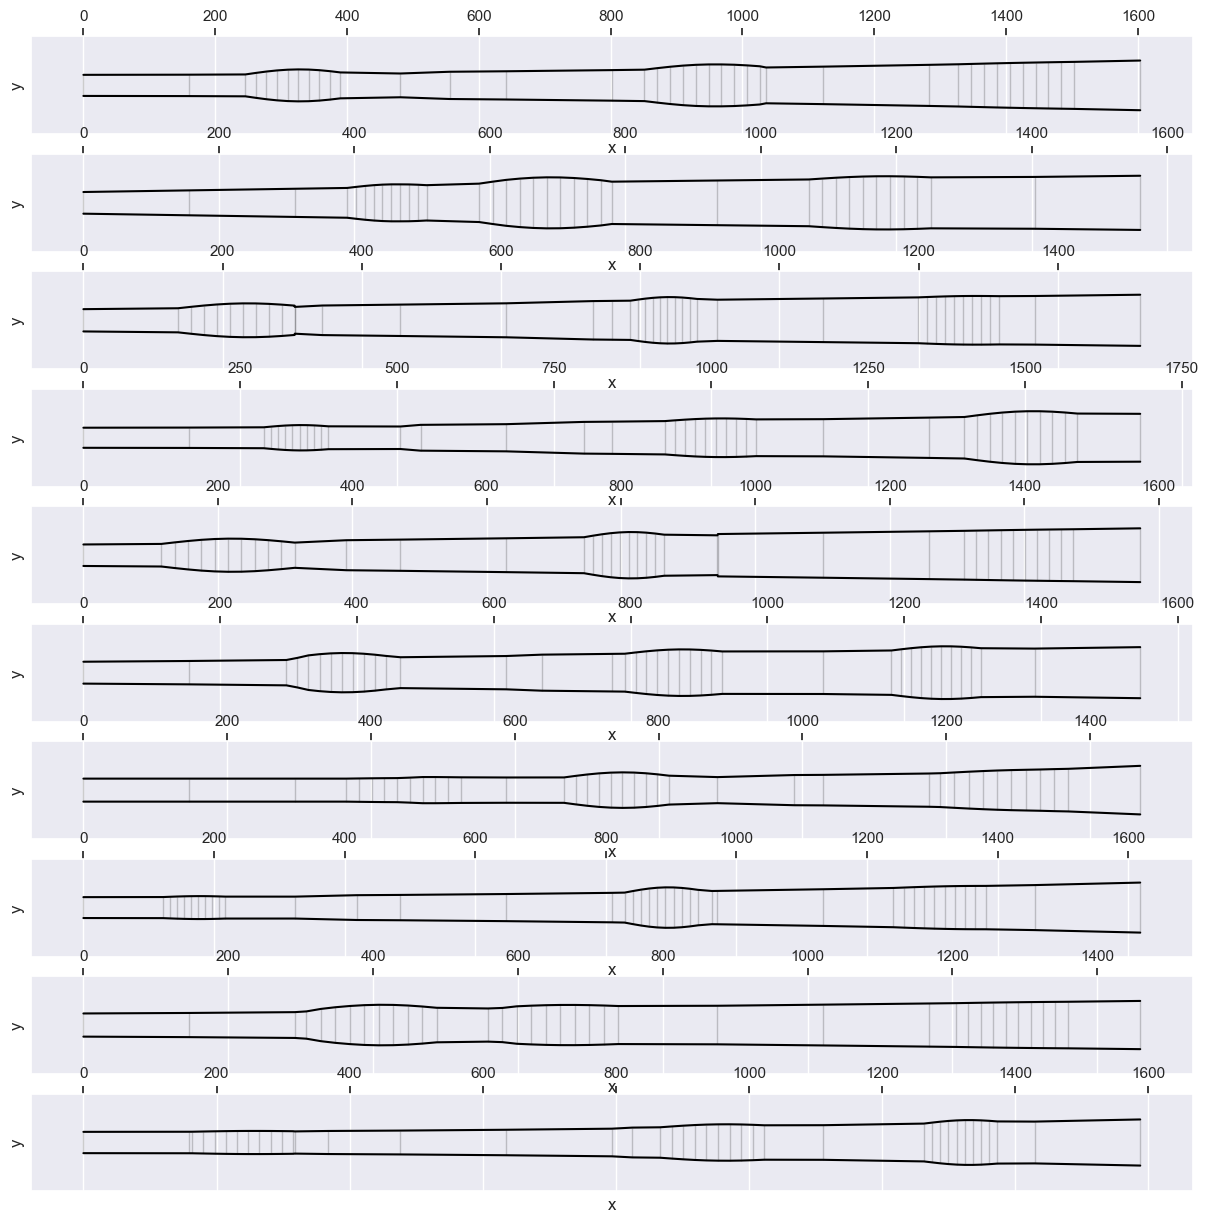

In [16]:
from didgelab.util.didge_visualizer import vis_didge
from didgelab.calc.geo import Geo
from didgelab.calc.sim.sim import quick_analysis
import json

f = os.path.join(latestfolder, "checkpoint_final_3", "geos.json")
geos = json.load(open(f, "r"))
geos = [Geo(geo) for geo in geos]
plt.figure(figsize=(15,15))
for i in range(len(geos)):
    plt.subplot(len(geos), 1, i+1)
    vis_didge(geos[i])

for geo in geos:
    analysis = quick_analysis(geo)
    notes = analysis["notes"]
    r = notes.note_name + " (" + notes.cent_diff.round(0).astype(int).astype(str) + ")"
    print(list(r))

In [15]:
losses

NameError: name 'losses' is not defined

In [11]:
notes=analysis["notes"]


0    D1 (-11)
1     F2 (21)
2    C#3 (17)
3     G3 (20)
4      B4 (0)
5    D4 (-39)
6    F4 (-31)
7    G#4 (28)
8    A#5 (17)
dtype: object